In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import image_dataset_from_directory

In [2]:
import cv2
import os
pieces=['Bishop','King','Knight','Pawn','Queen','Rook']

## Loading data

In [3]:
def load_and_preprocess_images(folder, target_size=(512, 512)):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, target_size)
            images.append(img)
    return images


folder_path = 'Chessman-image-dataset\Chess\Bishop'

Bishop_dataset = load_and_preprocess_images('Chessman-image-dataset\Chess\Bishop')
King_dataset = load_and_preprocess_images('Chessman-image-dataset\Chess\King')
Knight_dataset = load_and_preprocess_images('Chessman-image-dataset\Chess\Knight')
Pawn_dataset = load_and_preprocess_images('Chessman-image-dataset\Chess\Pawn')
Queen_dataset = load_and_preprocess_images('Chessman-image-dataset\Chess\Queen')
Rook_dataset = load_and_preprocess_images('Chessman-image-dataset\Chess\Rook')


dataset_array = np.array(Bishop_dataset+King_dataset+Knight_dataset+Pawn_dataset+Queen_dataset+Rook_dataset)

In [4]:
dataset_array

array([[[[ 58,  91, 124],
         [ 58,  91, 124],
         [ 58,  91, 124],
         ...,
         [ 75,  95, 126],
         [ 75,  95, 126],
         [ 75,  95, 126]],

        [[ 58,  91, 124],
         [ 58,  91, 124],
         [ 58,  91, 123],
         ...,
         [ 74,  94, 125],
         [ 74,  94, 125],
         [ 74,  94, 125]],

        [[ 58,  90, 123],
         [ 58,  90, 123],
         [ 58,  90, 123],
         ...,
         [ 70,  90, 121],
         [ 71,  91, 122],
         [ 71,  91, 122]],

        ...,

        [[156, 228, 253],
         [156, 228, 253],
         [156, 228, 253],
         ...,
         [119, 186, 228],
         [118, 185, 227],
         [118, 185, 227]],

        [[151, 224, 252],
         [151, 224, 252],
         [152, 225, 252],
         ...,
         [111, 180, 222],
         [111, 178, 221],
         [111, 178, 221]],

        [[150, 223, 251],
         [150, 223, 251],
         [150, 223, 251],
         ...,
         [109, 177, 219],
        

## shuffling data for better results

In [5]:
np.random.shuffle(dataset_array)

In [6]:
dataset_array

array([[[[242, 242, 242],
         [242, 242, 242],
         [242, 242, 242],
         ...,
         [229, 229, 229],
         [229, 229, 229],
         [229, 229, 229]],

        [[242, 242, 242],
         [242, 242, 242],
         [242, 242, 242],
         ...,
         [229, 229, 229],
         [229, 229, 229],
         [229, 229, 229]],

        [[242, 242, 242],
         [242, 242, 242],
         [242, 242, 242],
         ...,
         [229, 229, 229],
         [229, 229, 229],
         [229, 229, 229]],

        ...,

        [[ 72,  51,  50],
         [ 72,  51,  50],
         [ 72,  51,  50],
         ...,
         [ 72,  51,  50],
         [ 72,  51,  50],
         [ 72,  51,  50]],

        [[ 72,  51,  50],
         [ 72,  51,  50],
         [ 72,  51,  50],
         ...,
         [ 72,  51,  50],
         [ 72,  51,  50],
         [ 72,  51,  50]],

        [[ 72,  51,  50],
         [ 72,  51,  50],
         [ 72,  51,  50],
         ...,
         [ 72,  51,  50],
        

In [7]:
dataset_array=dataset_array/255

In [8]:
dataset_array

array([[[[0.94901961, 0.94901961, 0.94901961],
         [0.94901961, 0.94901961, 0.94901961],
         [0.94901961, 0.94901961, 0.94901961],
         ...,
         [0.89803922, 0.89803922, 0.89803922],
         [0.89803922, 0.89803922, 0.89803922],
         [0.89803922, 0.89803922, 0.89803922]],

        [[0.94901961, 0.94901961, 0.94901961],
         [0.94901961, 0.94901961, 0.94901961],
         [0.94901961, 0.94901961, 0.94901961],
         ...,
         [0.89803922, 0.89803922, 0.89803922],
         [0.89803922, 0.89803922, 0.89803922],
         [0.89803922, 0.89803922, 0.89803922]],

        [[0.94901961, 0.94901961, 0.94901961],
         [0.94901961, 0.94901961, 0.94901961],
         [0.94901961, 0.94901961, 0.94901961],
         ...,
         [0.89803922, 0.89803922, 0.89803922],
         [0.89803922, 0.89803922, 0.89803922],
         [0.89803922, 0.89803922, 0.89803922]],

        ...,

        [[0.28235294, 0.2       , 0.19607843],
         [0.28235294, 0.2       , 0.19607843]

## defining our model's architecture

In [9]:
input_shape = (512, 512, 3)

encoder = models.Sequential([
    layers.Input(shape=input_shape),
    
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same')
])

# Decoder
decoder = models.Sequential([
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),
    
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),
    
    layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')
])

autoencoder = models.Sequential([
    layers.Input(shape=input_shape),
    encoder,
    decoder
])

autoencoder.compile(optimizer='adam', loss='mean_squared_error')


autoencoder.summary()




Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 64, 64, 128)       93248     
                                                                 
 sequential_1 (Sequential)   (None, 512, 512, 3)       240707    
                                                                 
Total params: 333955 (1.27 MB)
Trainable params: 333955 (1.27 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
encoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 512, 512, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 256, 256, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 128, 128, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 64, 64, 128)       0

## training our model

In [11]:
history=autoencoder.fit(dataset_array, dataset_array, epochs=15, batch_size=32, validation_split=0.2)


Epoch 1/15

14/14 [==============================] - 162s 10s/step - loss: 0.1078 - val_loss: 0.0680
Epoch 2/15
14/14 [==============================] - 93s 6s/step - loss: 0.0488 - val_loss: 0.0229
Epoch 3/15
14/14 [==============================] - 81s 6s/step - loss: 0.0159 - val_loss: 0.0127
Epoch 4/15
14/14 [==============================] - 131s 10s/step - loss: 0.0130 - val_loss: 0.0234
Epoch 5/15
14/14 [==============================] - 119s 8s/step - loss: 0.0142 - val_loss: 0.0148
Epoch 6/15
14/14 [==============================] - 134s 10s/step - loss: 0.0106 - val_loss: 0.0094
Epoch 7/15
14/14 [==============================] - 130s 9s/step - loss: 0.0078 - val_loss: 0.0067
Epoch 8/15
14/14 [==============================] - 131s 9s/step - loss: 0.0056 - val_loss: 0.0052
Epoch 9/15
14/14 [==============================] - 145s 10s/step - loss: 0.0047 - val_loss: 0.0048
Epoch 10/15
14/14 [==============================] - 142s 10s/step - loss: 0.0044 - val_loss: 0.0044
Epoch

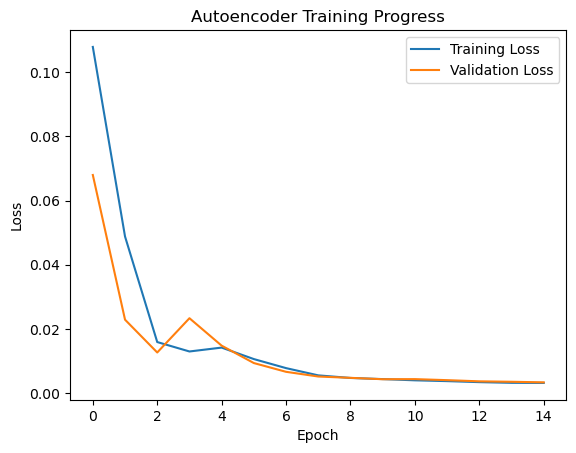

In [12]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Training Progress')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## testing our model

In [13]:
ex=dataset_array[:32,:,:,:]

ex.shape

(32, 512, 512, 3)

In [14]:
encoded_images = encoder.predict(ex)


reconstructed_images = decoder.predict(encoded_images)

1/1 [==============================] - 1s 699ms/step


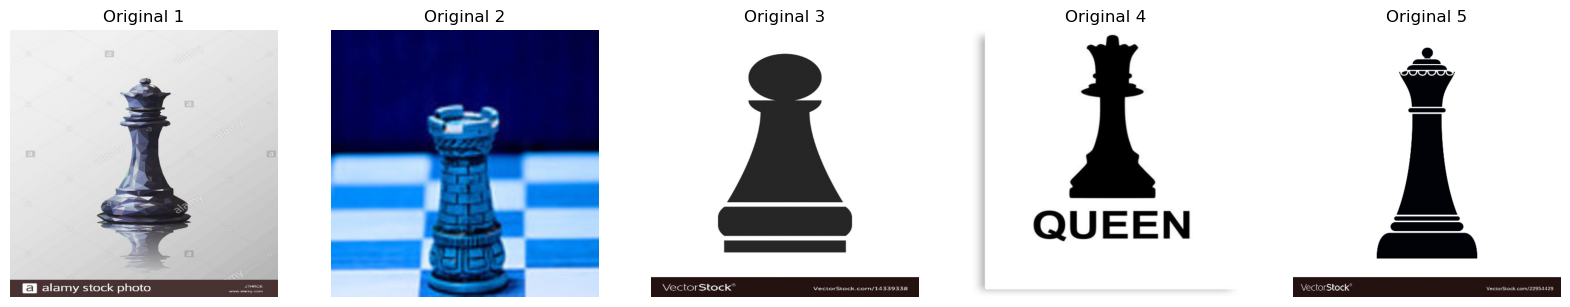

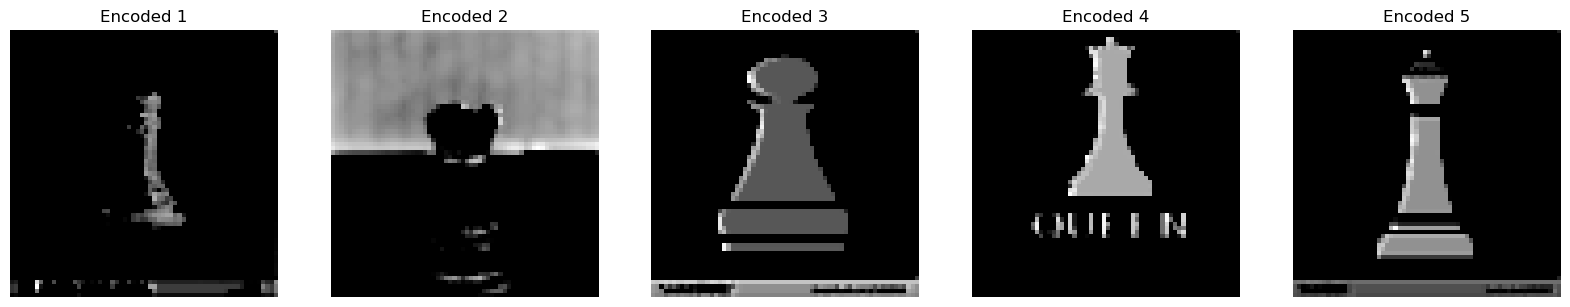

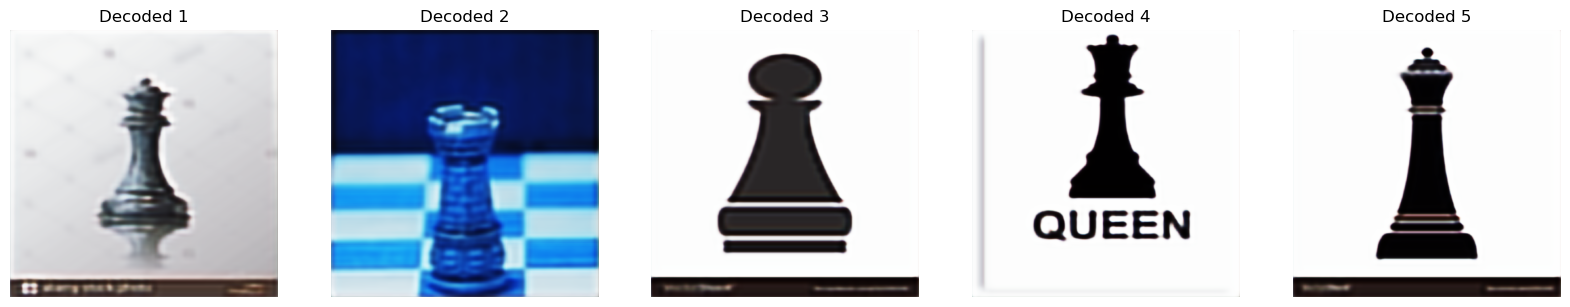

In [15]:
num_images_to_plot = 5
plt.figure(figsize=(20, 14))


for i in range(num_images_to_plot):
    plt.subplot(3, num_images_to_plot, i + 1)
    plt.imshow(ex[i])
    plt.title(f'Original {i + 1}')
    plt.axis('off')


encoded_images = np.squeeze(encoded_images)  
plt.figure(figsize=(20, 14))
for i in range(5):  
    plt.subplot(3, num_images_to_plot, i + 1)
    plt.imshow(encoded_images[i, :, :, 0], cmap='gray')  
    plt.title(f'Encoded {i+1}')
    plt.axis('off')

plt.figure(figsize=(20, 14))
for i in range(num_images_to_plot):
    plt.subplot(3, num_images_to_plot, 2 * num_images_to_plot + i + 1)
    plt.imshow(reconstructed_images[i])
    plt.title(f'Decoded {i + 1}')
    plt.axis('off')

plt.show()